# K-Means 
K-Means算法的执行流程如下:
- 选取k个初始质心做为初始的cluster
- 对每个样本点，计算得到距其最近的质心，将其类别标为该质心所对应的cluster
- 重新计算k个cluser对应的质心
- 直到质心不再发生变化

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
x = iris.data
x = x[:,:2]
y = iris.target

In [3]:
x.shape

(150, 2)

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

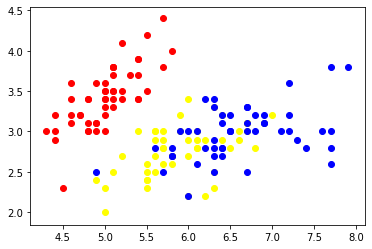

In [5]:
plt.scatter(x[y==0,0],x[y==0,1],color='red')
plt.scatter(x[y==1,0],x[y==1,1],color='yellow')
plt.scatter(x[y==2,0],x[y==2,1],color='blue')
plt.show()

### 指定K = 3

In [6]:
k = 3

### 选取k个质心

In [7]:
np.random.seed(666666)
choice = np.random.choice(len(x), k, replace=False)
choice

array([125,  43,  77])

In [8]:
choice = x[choice]
choice#选出来的k个质心

array([[7.2, 3.2],
       [5. , 3.5],
       [6.7, 3. ]])

### 对每个样本点，计算得到距其最近的质心，将其类别标为该质心所对应的cluster

In [9]:
np.sqrt(np.sum((choice[0] - x[1])**2))

2.308679276123039

In [10]:
label = []
distance = []
for data in x:
    near = float('inf')
    flag = 0
    for i,ch in enumerate(choice):
        dis = np.sqrt(np.sum((ch - data)**2))
        if dis < near:
            near = dis
            flag = i
    label.append(flag)
    distance.append(near)

In [11]:
label[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [12]:
distance[:10]

[0.09999999999999964,
 0.5099019513592784,
 0.4242640687119283,
 0.5656854249492381,
 0.10000000000000009,
 0.5656854249492381,
 0.4123105625617664,
 0.10000000000000009,
 0.8485281374238569,
 0.41231056256176585]

### 重新计算k个cluser对应的质心

In [13]:
for i in range(k):
    new_choice = np.zeros(2)
    cnt = 0
    for index, data in enumerate(x):
        if label[index] == i:
            cnt += 1
            new_choice += data
    new_choice /= cnt
    choice[i] = new_choice

In [14]:
choice

array([[7.43846154, 3.13076923],
       [5.13472222, 3.18611111],
       [6.30923077, 2.9       ]])

In [15]:
label = np.array(label)

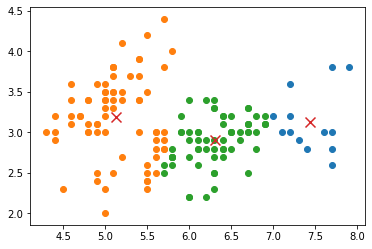

In [16]:
for i in range(k):
    plt.scatter(x[label==i,0],x[label==i,1])
plt.scatter(choice[:,0],choice[:,1],marker='x',s=100)
plt.show()

### 再来一轮

In [17]:
label = []
distance = []
for data in x:
    near = float('inf')
    flag = 0
    for i,ch in enumerate(choice):
        dis = np.sqrt(np.sum((ch - data)**2))
        if dis < near:
            near = dis
            flag = i
    label.append(flag)
    distance.append(near)

In [18]:
for i in range(k):
    new_choice = np.zeros(2)
    cnt = 0
    for index, data in enumerate(x):
        if label[index] == i:
            cnt += 1
            new_choice += data
    new_choice /= cnt
    choice[i] = new_choice

In [19]:
choice

array([[7.31176471, 3.12941176],
       [5.10294118, 3.21176471],
       [6.23384615, 2.87692308]])

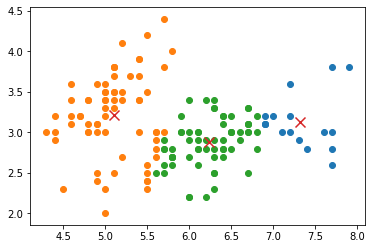

In [20]:
label = np.array(label)
for i in range(k):
    plt.scatter(x[label==i,0],x[label==i,1])
plt.scatter(choice[:,0],choice[:,1],marker='x',s=100)
plt.show()